# **1. Install Required Libraries**

In [18]:
# Install Required Libraries (Run This Once)
!pip install pandas mlxtend matplotlib seaborn openpyxl

# **2. Import Required Libraries**

In [19]:
# Import Required Libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Load and Clean the Dataset**

In [20]:
# Load the Data
file_path = '/content/Online retail.xlsx'
df = pd.read_excel(file_path)

# Drop missing rows if any
df.dropna(inplace=True)

# **4. Preview the Dataset**

In [21]:
# Preview the Data
print(df.head())
print("\nShape of the data:", df.shape)

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

# **5. Convert String of Items to List**

In [22]:
# Step 1: Convert String of Items → List
#transactions = df.iloc[:, 0].apply(lambda x: x.split(','))  # split items by comma
transactions = df.iloc[:, 0].apply(lambda x: [item.strip() for item in x.split(',')])


# **6. One-Hot Encode Transactions**

In [24]:
# Step 2: Use TransactionEncoder to One-Hot Encode
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Check encoded basket
print("\nEncoded Transaction DataFrame:\n", df_encoded.head())


Encoded Transaction DataFrame:
    almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0    False              False      False    False        False  False   
1    False              False      False    False        False  False   
2    False              False      False     True        False  False   
3    False              False      False    False        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...    True   
3           False      False        False       False  ...   False   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0           False        False       False 

# **7. Generate Frequent Itemsets**

In [25]:
# Step 3: Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# **8. Generate and Filter Association Rules**

In [26]:
# Step 4: Generate Association Rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Filter for strong rules
#rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 3)]
rules = rules[(rules['confidence'] >= 0.2) & (rules['lift'] >= 1.2)]

# **9. Display Top Association Rules**

In [27]:
# Display Top Rules
print("\nTop Rules:\n")

# Convert frozensets to readable strings BEFORE printing
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Now print the selected columns
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Rules:

          antecedents    consequents   support  confidence      lift
1             burgers           eggs  0.028800    0.330275  1.837585
3             burgers   french fries  0.022000    0.252294  1.475976
7             burgers      spaghetti  0.021467    0.246177  1.413729
8                cake  mineral water  0.027467    0.338816  1.422002
11            chicken  mineral water  0.022800    0.380000  1.594852
14       french fries      chocolate  0.034400    0.201248  1.228121
15          chocolate   french fries  0.034400    0.209927  1.228121
16  frozen vegetables      chocolate  0.022933    0.240559  1.468019
20        ground beef      chocolate  0.023067    0.234735  1.432478
22               milk      chocolate  0.032133    0.247942  1.513074


# **10. Visualize Rules: Basic Scatter Plot**

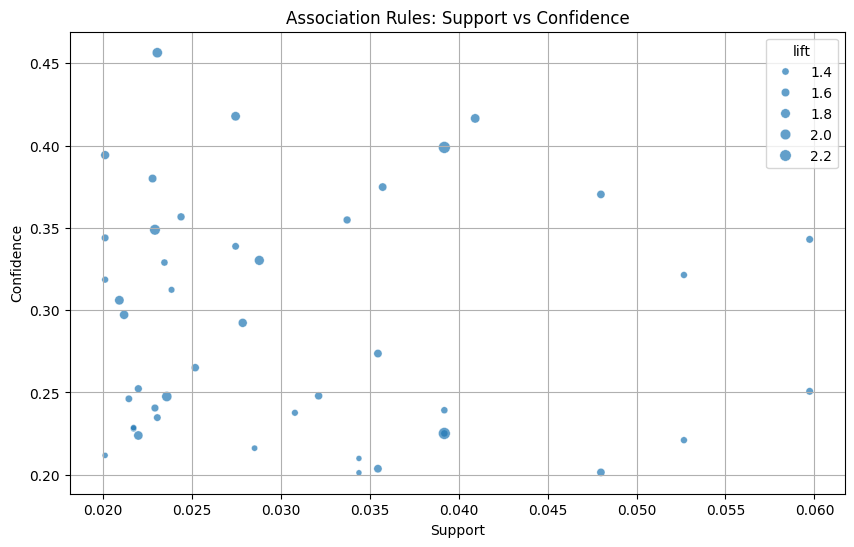

In [28]:
# Visualize Support vs Confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.7)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# **11. Visualize Rules: Bubble Chart by Lift**

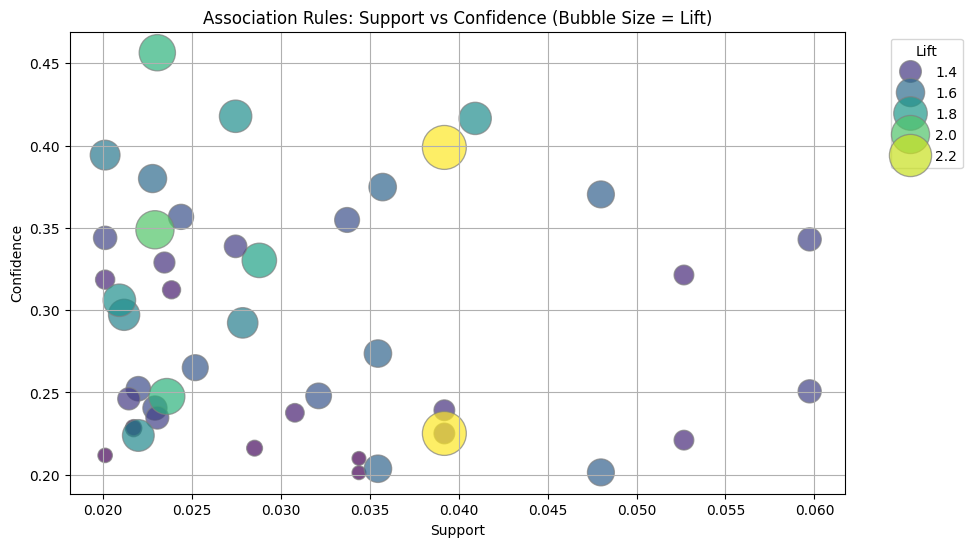

In [29]:
# Plot Support vs Confidence with Lift as Bubble Size
plt.figure(figsize=(10, 6))

# Check if 'rules' DataFrame is not empty
if not rules.empty:
    sns.scatterplot(
        data=rules,
        x='support',
        y='confidence',
        size='lift',
        hue='lift',
        palette='viridis',
        sizes=(100, 1000),  # scale bubble sizes
        alpha=0.7,
        edgecolor='gray'
    )
    plt.title('Association Rules: Support vs Confidence (Bubble Size = Lift)')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.grid(True)
    plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("No rules to plot. Try lowering support/lift thresholds.")


# **12. Analysis, Interpretation and Interview Questions**

In [30]:
#  Analysis and Interpretation
print("\n Analysis and Interpretation:")
print("• The generated association rules reveal interesting patterns in customer purchasing behavior.")
print("• For example, if a rule shows that buying 'mineral water' often leads to purchasing 'green tea',")
print("  it suggests a common health-conscious customer segment.")
print("• Support values indicate how frequently itemsets occur together.")
print("• Confidence shows the reliability of the rule (i.e., how likely Y is bought when X is bought).")
print("• A high lift (>1) confirms a strong relationship between items — useful for business decisions.")

#  Interview Questions and Answers
print("\n Interview Questions and Answers:")

print("\n1. What is lift and why is it important in Association Rules?")
print("• Lift measures how much more often two items occur together than expected if they were independent.")
print("• Formula: lift(X → Y) = confidence(X → Y) / support(Y)")
print("• A lift > 1 indicates a strong association between X and Y.")

print("\n2. What is Support and Confidence? How do you calculate them?")
print("• Support is the proportion of transactions that contain both X and Y.")
print("  → support(X → Y) = (transactions containing both X and Y) / total transactions")
print("• Confidence is the probability that Y is purchased when X is purchased.")
print("  → confidence(X → Y) = support(X ∩ Y) / support(X)")

print("\n3. What are some limitations or challenges of Association Rule Mining?")
print("• It may generate a large number of trivial or redundant rules.")
print("• High confidence does not always mean a strong relationship if support is very low.")
print("• Threshold tuning for support, confidence, and lift is required and domain-specific.")
print("• It does not capture sequential or time-based buying patterns.")



 Analysis and Interpretation:
• The generated association rules reveal interesting patterns in customer purchasing behavior.
• For example, if a rule shows that buying 'mineral water' often leads to purchasing 'green tea',
  it suggests a common health-conscious customer segment.
• Support values indicate how frequently itemsets occur together.
• Confidence shows the reliability of the rule (i.e., how likely Y is bought when X is bought).
• A high lift (>1) confirms a strong relationship between items — useful for business decisions.

 Interview Questions and Answers:

1. What is lift and why is it important in Association Rules?
• Lift measures how much more often two items occur together than expected if they were independent.
• Formula: lift(X → Y) = confidence(X → Y) / support(Y)
• A lift > 1 indicates a strong association between X and Y.

2. What is Support and Confidence? How do you calculate them?
• Support is the proportion of transactions that contain both X and Y.
  → suppo